In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3713122185181310837,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5539033720863514806
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3032612864
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2708250743192450070
 physical_device_desc: "device: 0, name: GeForce GTX 1650 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10379318146816193191
 physical_device_desc: "device: XLA_GPU device"]

In [3]:
df = pd.read_csv(r'../Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Can amount and time classify fraud transfer?

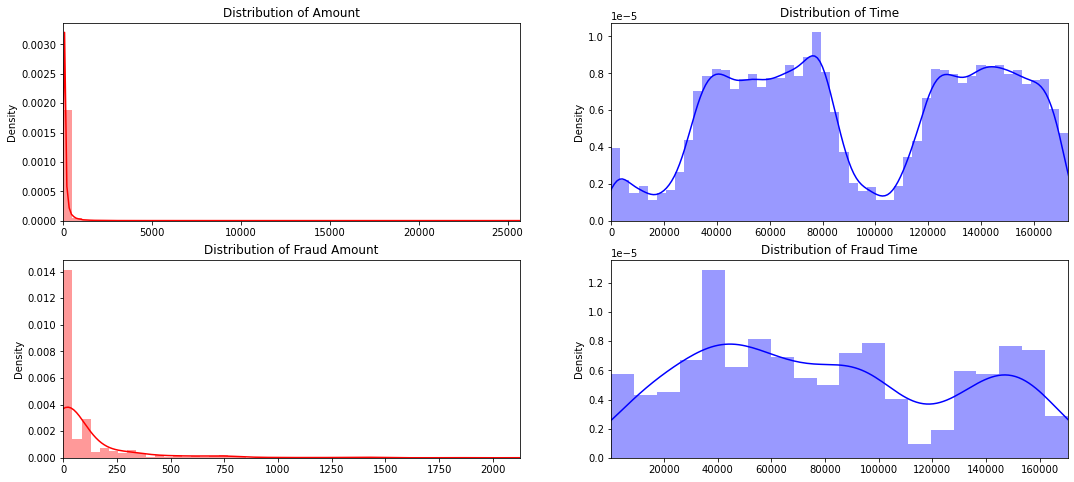

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(18,8))

amount = df['Amount'][0==df['Class']].values
time = df['Time'][0==df['Class']].values

fraud_amount = df['Amount'][1==df['Class']].values
fraud_time = df['Time'][1==df['Class']].values

sns.distplot(amount, ax=ax[0][0], color='r')
ax[0][0].set_title('Distribution of Amount')
ax[0][0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[0][1], color='b')
ax[0][1].set_title('Distribution of Time')
ax[0][1].set_xlim([min(time), max(time)])


sns.distplot(fraud_amount, ax=ax[1][0], color='r')
ax[1][0].set_title('Distribution of Fraud Amount')
ax[1][0].set_xlim([min(fraud_amount), max(fraud_amount)])

sns.distplot(fraud_time, ax=ax[1][1],bins=20, color='b')
ax[1][1].set_title('Distribution of Fraud Time')
ax[1][1].set_xlim([min(fraud_time), max(fraud_time)])


plt.show()

In [5]:
totalZero = sum(df['Amount'] == 0)
fraudZero = sum(fraud_amount==0)
fraud = len(fraud_amount)
total = len(df)
A = fraudZero/fraud
B = fraud / total
C = totalZero / total
numrtr = A*B
denmtr = C
print("Probabilty that it is fraud if it is zero: {:.3f}".format(numrtr/denmtr))

Probabilty that it is fraud if it is zero: 0.015


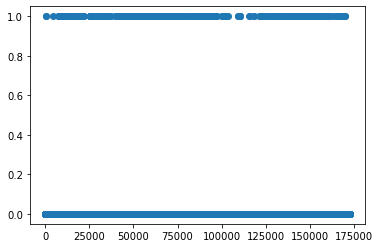

In [6]:
plt.scatter(df['Time'],df['Class'])

## Analysing other parameters

In [7]:
data = df.drop(['Amount','Time'],axis=1)

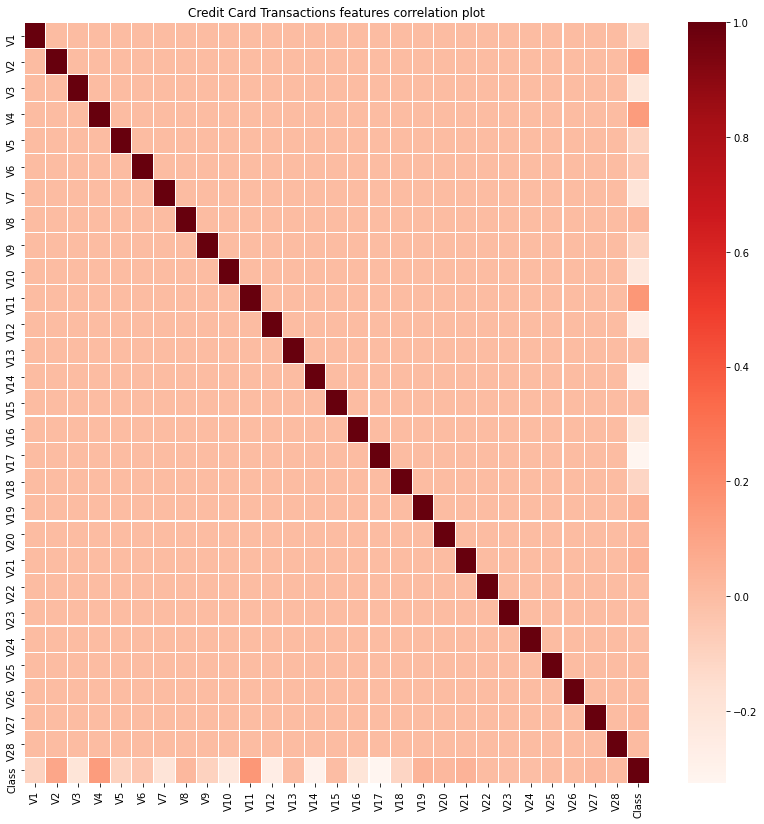

In [5]:
# Correlation analysis
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

<Figure size 432x288 with 0 Axes>

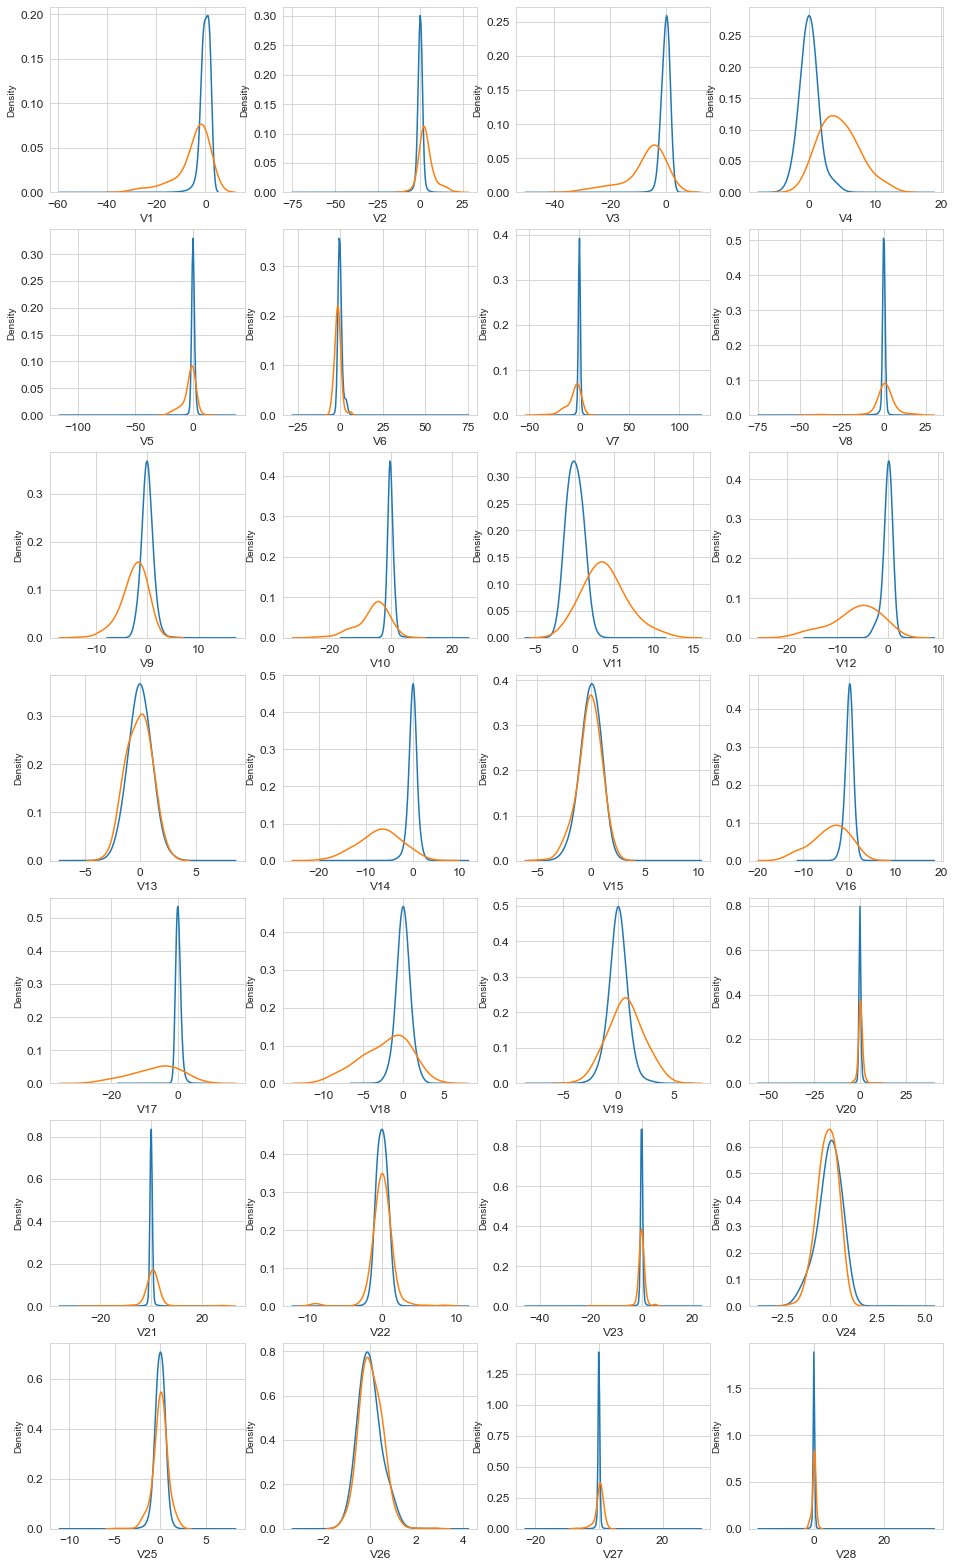

In [14]:
var = data.drop(['Class'],axis=1).columns.values


t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for i,feature in enumerate(var,1):
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [12]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13'], axis =1)

In [13]:
weight_for_0 = (total / len(amount))/2.0 
weight_for_1 = (total / len(fraud_amount))/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [14]:
initial_bias = np.log([len(fraud_amount)/len(amount)])
print("Initial bias: {}".format(initial_bias))

Initial bias: [-6.35935934]


In [15]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
new_df = pd.DataFrame(Scaler.fit_transform(df))

In [16]:
X = new_df.values
Y = df['Class'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2)


print("Training feature: {}".format(X_train.shape))
print("Training labels: {}".format(y_train.shape))
print("Testing feature: {}".format(X_test.shape))
print("Testing labels: {}".format(y_test.shape))
print("Validation feature: {}".format(X_val.shape))
print("Validation labels: {}".format(y_val.shape))

Training feature: (182276, 21)
Training labels: (182276,)
Testing feature: (56962, 21)
Testing labels: (56962,)
Validation feature: (45569, 21)
Validation labels: (45569,)


In [89]:
from keras.layers import Dense
from keras.layers import Dropout
from keras import Sequential
import keras
import tensorflow as tf

In [90]:
train_features = np.array(train_df)

In [91]:
output_bias = tf.keras.initializers.Constant(initial_bias)

In [92]:
output_bias

In [93]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [94]:
model = Sequential(
    [
        Dense(16, activation="relu", name="layer1",input_shape=(train_df.shape[-1],)),
        Dense(32, activation="relu", name="layer2"),
        Dropout(0.5),
        Dense(1, activation='sigmoid',name="layer3",bias_initializer=output_bias)
    ]
)

In [95]:
model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [96]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 16)                352       
_________________________________________________________________
layer2 (Dense)               (None, 32)                544       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [98]:
results = model.evaluate(X_train, y_train, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0143


In [99]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [102]:
BATCH_SIZE = 2048
EPOCHS = 50

In [108]:
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    class_weight = class_weight,
    validation_data=(X_val, y_val))

Epoch 1/50
90/90 [==============================] - 1s 7ms/step - loss: 1.8478 - tp: 71.0000 - fp: 4.0000 - tn: 181978.0000 - fn: 223.0000 - accuracy: 0.9988 - precision: 0.9467 - recall: 0.2415 - auc: 0.8415 - val_loss: 0.0018 - val_tp: 79.0000 - val_fp: 0.0000e+00 - val_tn: 45488.0000 - val_fn: 2.0000 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 0.9753 - val_auc: 1.0000
Epoch 2/50
90/90 [==============================] - 0s 5ms/step - loss: 0.1879 - tp: 259.0000 - fp: 22.0000 - tn: 181960.0000 - fn: 35.0000 - accuracy: 0.9997 - precision: 0.9217 - recall: 0.8810 - auc: 0.9892 - val_loss: 0.0015 - val_tp: 81.0000 - val_fp: 5.0000 - val_tn: 45483.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9999 - val_precision: 0.9419 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 3/50
90/90 [==============================] - 0s 5ms/step - loss: 0.0544 - tp: 282.0000 - fp: 23.0000 - tn: 181959.0000 - fn: 12.0000 - accuracy: 0.9998 - precision: 0.9246 - recall: 0.9592 - auc: 0.9981 - val_l

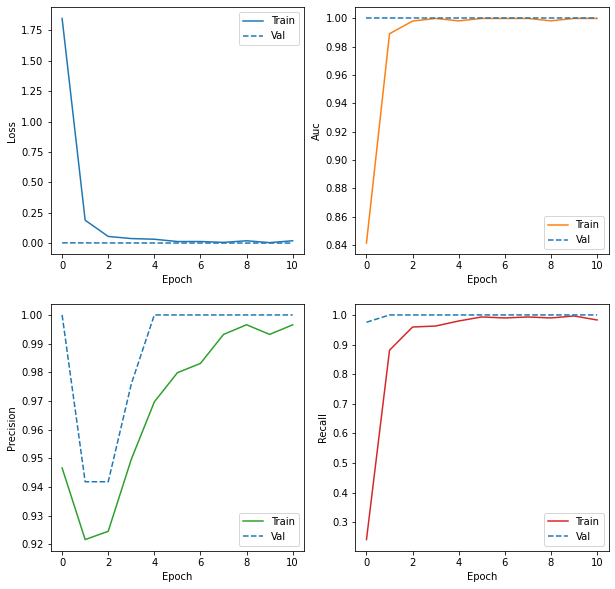

In [132]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
metrics =  ['loss', 'auc', 'precision', 'recall']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[n], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

<AxesSubplot:>

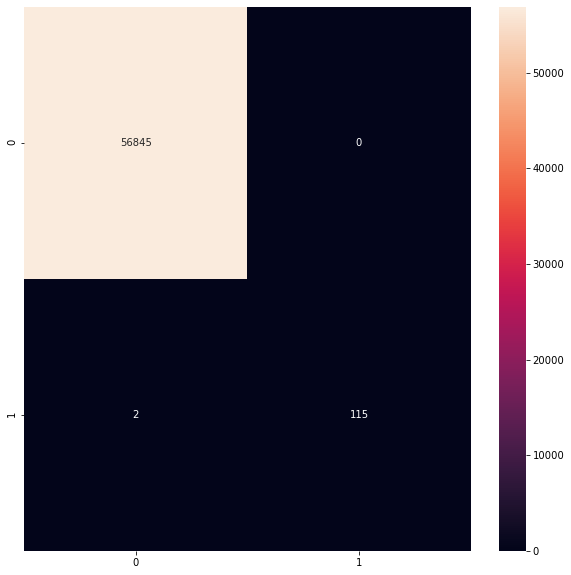

In [135]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test) > 0.5
clf = confusion_matrix(y_test > 0.5,y_pred)
sns.heatmap(clf, annot=True,fmt='g') 

# SUMMARY

1. By seeing distribution of time and amount concluded that they were not significant parameters to detect fraud
2. Dropped all of the features with very similar distributions between the two types of transactions.
3. Used custom bias initializer for output bias (log(pos/neg))
4. Found the best class weights 
5. Created Metric 
6. Classification Report :
                         precision    recall  f1-score   support

              False       1.00      1.00      1.00       56845
               True       1.00      0.98      0.99         117
  
            accuracy                          1.00       56962
           macro avg      1.00      0.99      1.00       56962
        weighted avg      1.00      1.00      1.00       56962